<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Machine-Learning/Clustering/Hierarchical%20clustering/Hierarchical_clustering_Project_on_Advertising_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://bit.ly/2FToHMJ')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df.iloc[:, [3, 4]].values
X[:3]

array([[15, 39],
       [15, 81],
       [16,  6]])

# Find Optimal number of Cluster for our dataset

## By Dendrogram

### import hierarchy from scipy

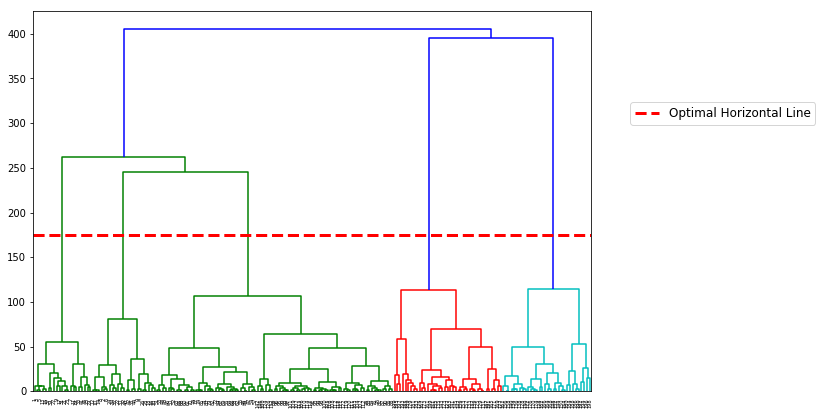

In [5]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize = (10, 7))
hc = sch.linkage(X, method = 'ward')
dendrogram = sch.dendrogram(hc)
plt.axhline(y = 175, linewidth=3, color='r',linestyle = '--', label = 'Optimal Horizontal Line')
plt.plot()
#method = ward means we are minimizing the variance between clusters, before in k-means  cluster we are minimze the WCSS**
plt.legend(loc = (1.07, .7), fontsize = 'large')
plt.show()

### ^^Method to choose optimal number of clusters
- first choose a vertical line which have maximum length and make sure it's not touching the base line -----> in this case it's **dark blue line in our dendrogram's right side**
- go throught the line downside and check **is this line crossing any horizontal line** ---------> **as we can see there is no horizontal line between 270 - 400 but there is a green horizontal line at 250 so the line 1 distance is 380-270 = 110 and another line starts from 280-100 = 180 so it have maximu distance**
- and select the  region which have **maximum distance without crossing horizontal line** and this region is called **optimal region** ---> optimal region is **from 280-100**
- **draw a horizontal line in this optimal region** and this line is called **optimal horzontal line**
- check how many lines are crossing this **optimal horizontal line** and **count** and this count is **optimal number of cluster**

**^^from this dendrogram we can see that there are optimal number of cluster are 5**

In [0]:
optimal_clusters = 5

In [10]:
hc[::-1, :][:5]

array([[396.        , 397.        , 405.66004104, 200.        ],
       [393.        , 394.        , 394.8596576 ,  71.        ],
       [387.        , 395.        , 262.5626341 , 129.        ],
       [391.        , 392.        , 245.65460099, 108.        ],
       [384.        , 386.        , 113.88601652,  32.        ]])

# Make model

## AgglomerativeClustering

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
model = AgglomerativeClustering(n_clusters = optimal_clusters, linkage = 'ward', affinity = 'euclidean')

In [0]:
y_label = model.fit_predict(X)

In [0]:
y_label[:3]

array([4, 3, 4])

In [0]:
model.n_clusters

5

## Visualisation

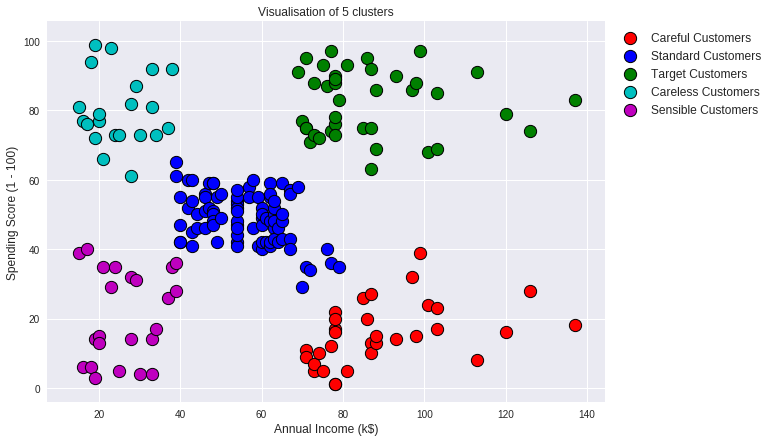

In [0]:
c = ['r', 'b', 'g', 'c', 'm']
labels = ['Careful', 'Standard', 'Target', 'Careless', 'Sensible']
plt.figure(figsize = (10, 7))
Range = list(range(5))
for i, j, k in zip(Range, c, labels):
  plt.scatter(X[y_label == i, 0], X[y_label == i, 1], c = j, linewidths = 1, edgecolors = 'black', s = 150, cmap = 'coolwarm', label = k + ' Customers')
plt.legend(loc = (1.07, .9), fontsize = 'large')
plt.title(f'Visualisation of {optimal_clusters} clusters')
plt.xlabel('Annual Income (k$)',fontsize =  'large')
plt.ylabel('Spending Score (1 - 100)',fontsize =  'large')
plt.show()

# Conclustion of Project

**By visualising this graph we can conclude that is**
- cluster 1 (**lower left**) having **Low Income, Low Spending**                  ------->**Sensible Customers**
-  cluster 2 (**lower right**) having **High Income, Low Spending**  ------>**Careful Customers**
-  cluster 3 (**Center**) having **Medium Income, Medium Spending**------>**Standard Customers**
-  cluster4 (**Upper Left**) having **Low income, High Spending**             ------>**Carless Customers**
-  
cluster 5 (**Upper Right**) having **High Income, High Spending**------>**Target Customers**

## By seaborn Clustermap

**also, we can use seaborn's clustermap to determine the optimal_number of clusters**

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


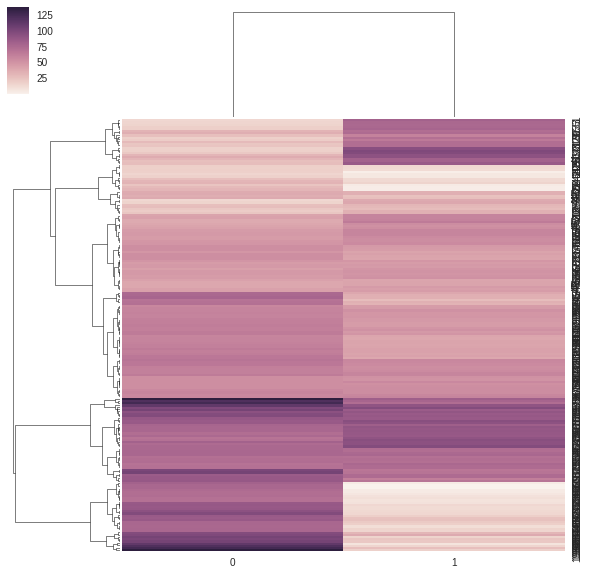

In [0]:
sns.clustermap(X, method = 'ward')

# KMeans Clustering vs Hierarchical clustering

In [0]:
#import KMeans cluster
from sklearn.cluster import KMeans

In [0]:
#import Hierarchical Cluster
from sklearn.cluster import AgglomerativeClustering

In [0]:
kmeans = KMeans(n_clusters = 5)
hc = AgglomerativeClustering(n_clusters = 5)
y_kmeans = kmeans.fit_predict(X)
y_hc = hc.fit_predict(X)

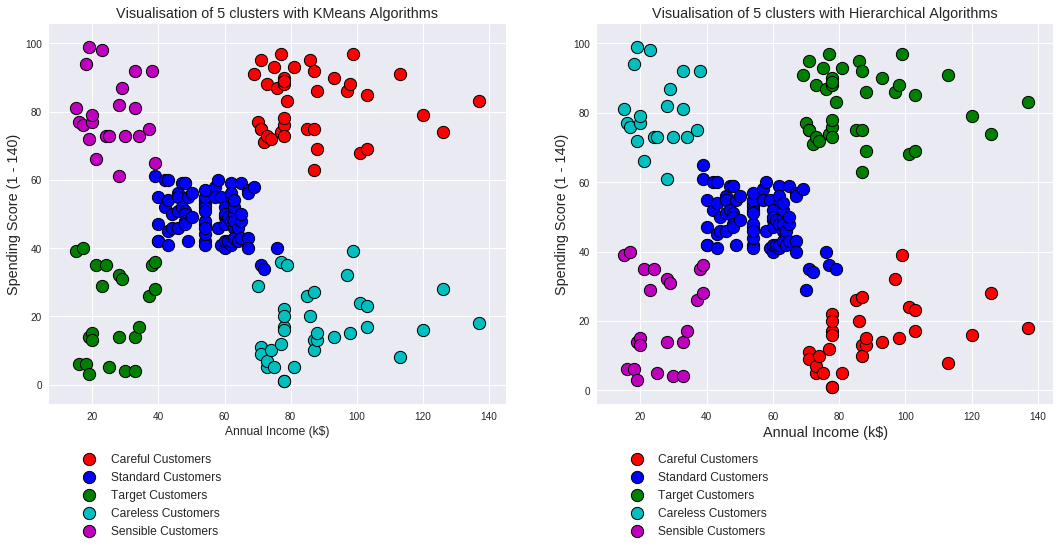

In [0]:
c = ['r', 'b', 'g', 'c', 'm']
labels = ['Careful', 'Standard', 'Target', 'Careless', 'Sensible']
#plt.figure(figsize = (10, 7))
y_label = y_kmeans
Range = list(range(5))
plt.figure(figsize = (18, 7))
plt.subplot(1, 2, 1)
plt.title(f'Visualisation of {optimal_clusters} clusters with KMeans Algorithms',fontsize =  'x-large')
plt.xlabel('Annual Income (k$)',fontsize =  'large')
plt.ylabel('Spending Score (1 - 140)',fontsize =  'x-large')
for i, j, k in zip(Range, c, labels):
  plt.scatter(X[y_label == i, 0], X[y_label == i, 1], c = j, linewidths = 1, edgecolors = 'black', s = 150, cmap = 'coolwarm', label = k + ' Customers')
plt.legend(bbox_to_anchor = (0.4, -0.1), fontsize = 'large')

#plt.show()
plt.subplot(1, 2, 2)
plt.title(f'Visualisation of {optimal_clusters} clusters with Hierarchical Algorithms' ,fontsize =  'x-large')
plt.xlabel('Annual Income (k$)',fontsize =  'x-large')
plt.ylabel('Spending Score (1 - 140)',fontsize =  'x-large')
#plt.figure(figsize = (10, 7))
y_label = y_hc
Range = list(range(5))
for i, j, k in zip(Range, c, labels):
  plt.scatter(X[y_label == i, 0], X[y_label == i, 1], c = j, linewidths = 1, edgecolors = 'black', s = 150, cmap = 'coolwarm', label = k + ' Customers')
plt.legend(bbox_to_anchor = (0.4, -0.1), fontsize = 'large')
plt.show()